In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [3]:
# Load the dataset
data = pd.read_csv(r"C:\Users\admin\Downloads\CODECLAUSE INTERN\creditcard.csv")

# Check for null values and dataset shape
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_22952\2836611689.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='coolwarm')


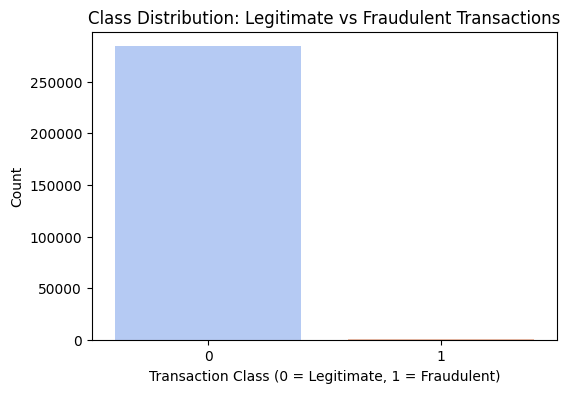

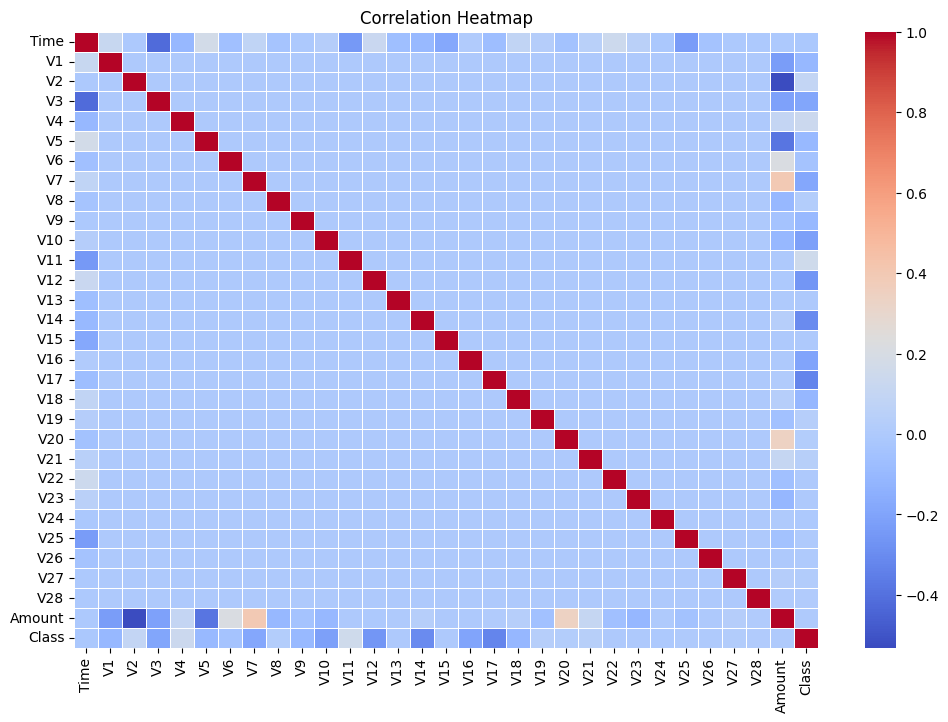

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check class distribution
print(data['Class'].value_counts())

# Visualize class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data, palette='coolwarm')
plt.title("Class Distribution: Legitimate vs Fraudulent Transactions")
plt.xlabel("Transaction Class (0 = Legitimate, 1 = Fraudulent)")
plt.ylabel("Count")
plt.show()

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [6]:
# Split features and labels
X = data.drop(columns=['Class'])
y = data['Class']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance (undersampling example)
fraud = data[data['Class'] == 1]
legit = data[data['Class'] == 0]
legit_downsampled = resample(legit, replace=False, n_samples=len(fraud), random_state=42)

balanced_data = pd.concat([fraud, legit_downsampled])
X_balanced = balanced_data.drop(columns=['Class'])
y_balanced = balanced_data['Class']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

In [8]:
# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       146
           1       0.99      0.88      0.93       150

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

Confusion Matrix:
 [[145   1]
 [ 18 132]]
ROC AUC Score: 0.9834474885844748


In [9]:
import joblib

# Save the trained model
joblib.dump(clf, 'credit_fraud_model.pkl')

# Load the model for future use
loaded_model = joblib.load('credit_fraud_model.pkl')
